Part 1- MLP Training From Scratch

In [1]:
import numpy as np
import pandas as pd
import torch
import io
from IPython.display import clear_output 

In [3]:
#Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving training_labels_bin.csv to training_labels_bin.csv
Saving training_set.csv to training_set.csv
Saving validation_labels_bin.csv to validation_labels_bin.csv
Saving validation_set.csv to validation_set.csv


In [4]:
# Setting Training and Validation Data

x_train = pd.read_csv('/content/training_set.csv', header=None).values
y_train = pd.read_csv('/content/training_labels_bin.csv', header=None).values
x_val = pd.read_csv('/content/validation_set.csv', header=None).values
y_val = pd.read_csv('/content/validation_labels_bin.csv', header=None).values

train_N = len(x_train)
val_N= len(x_val)

num_feats = x_train.shape[1]
n_out = y_train.shape[1]

print("nb train samples:", train_N, "\nnb feat:", num_feats, "\nn_out:", n_out)
print("y_train max:", y_train.max(), "y_train min:", y_train.min())

nb train samples: 8442 
nb feat: 354 
n_out: 3
y_train max: 1 y_train min: 0


In [5]:
#Sigmoid activation function
def Sigmoid(x):
  return 1/(1+np.exp(-x))

  #Sigmoid First Derivative
def Sigmoid_FD(x):
  return x*(1-x)

In [6]:
#Provided Base Code:
import matplotlib.pyplot as plt

# hyperparameters (you may change these)
eta = 0.1 # intial learning rate
gamma = 0.1 # multiplier for the learning rate
stepsize = 200 # epochs before changing learning rate
threshold = 0.0001 # stopping criterion
test_interval = 1 # number of epoch before validating
max_epoch = 1_000


#defining necisary functions (Sigmoid and First derivative of Sigmoid, along with the SSE and Mean SSE) 
def sigmoid(z):
 return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
 return sigmoid(z) * (1 - sigmoid(z))

def sum_squared_error(y, y_pred):
  return np.sum((y_pred - y) ** 2, axis=0)

def mean_sum_squared_error(y, y_pred):
 return np.mean(sum_squared_error(y, y_pred))


# Define Architecture of NN

input_size = 354 # number of features in dataset
hidden_layer_1_size = 128
hidden_layer_2_size = 64
n_out = 3 # size of output layer


# [ ] Intialize your network weights and biases here

#TODO: Change to Numpy's default random number generator once working

w_i_h = np.random.randn(hidden_layer_1_size, input_size) # weights between input layer and first hidden layer
b_i_h = np.zeros((hidden_layer_1_size, 1)) # biases of input to first hidden layer
w_h_h = np.random.randn(hidden_layer_2_size, hidden_layer_1_size) # weights between first hidden layer and second hidden layer
b_h_h = np.zeros((hidden_layer_2_size, 1)) # biases of first hidden layer to second hidden layer
w_h_o = np.random.randn(n_out, hidden_layer_2_size) # weights between second hidden layer and output layer
b_h_o = np.zeros((n_out, 1)) # biases of second hidden layer to output layer



def SGD( X, Y, lr=eta, batch_size=1):
  global w_i_h, b_i_h, w_h_h, b_h_h, w_h_o, b_h_o, eta, gamma #making the initialized weights and biases global so the SGD function can acess the variables
  
  '''
  w = np.random.randn(1,354)  # Randomly initializing weights. 354 is the number of features in dataset
  b= np.random.randn(1,1) #randomly initialiing bias
  '''

  #error when changing var name form X_train to X. Possible bug 

  N = len(X) # dataset size
  num_feats = len(X[0]) # number of features

#initializing the arrays to store the outputs.
  train_epochs = []
  valid_epochs = []
  train_loss = []
  valid_loss = []

  for epoch in range(0, max_epoch):
    
    order = np.random.permutation(N) # shuffling data
    

    sse = 0 #initializing sse per epoch value.
    for n in range(0, N): #iteration per training sample.
        idx = order[n]

        # get a sample 
        x_in = np.array(X[idx]).reshape((num_feats, 1)) # 1 as batch size=1
        y = np.array(Y[idx]).reshape((n_out, 1)) # 1 as batch size=1

        # [ ] do the forward pass here (sigmoid activation)
        # hint: you need to save the output of each layer to calculate the gradients later
        
        # Calculate the output of the first hidden layer
        z_i_h = w_i_h @ x_in + b_i_h #z_i_h -> z input to hidden. z is preactivated input to the first hidden layer.
        h_i_h = sigmoid(z_i_h) #activted z_i_h

        # Calculate the output of the second hidden layer
        z_h_h = w_h_h @ h_i_h + b_h_h #z_h_h -> z hidden to hidden. z is preactivated input to the second hidden layer
        h_h_h = sigmoid(z_h_h) #activted z_h_h

        # Calculate the output of the output layer
        z_h_o = w_h_o @ h_h_h + b_h_o #z_h_o -> z hidden to hidden. z is preactivated input to the output layer
        y_pred = sigmoid(z_h_o) #acticated z_h_o

        # [ ] compute SGD error and gradients here
        # hint: don't forget the chain rule

        # Calculate the error
        error = y - y_pred

        # Calculate the gradients for the weights and biases in the output layer
        d_b_o_h = error * sigmoid_prime(z_h_o) #bias gradient from output layer to second hidden layer.
        d_w_o_h = np.dot(d_b_o_h, h_h_h.T) #weight gradient from ouput layer to second hidden layer. 

        # Calculate the gradients for the weights and biases in the second hidden layer
        d_b_h_h = np.dot(w_h_o.T, d_b_o_h) * sigmoid_prime(z_h_h) #bias gradient from second hidden layer to first hidden layer
        d_w_h_h = np.dot(d_b_h_h, h_i_h.T) #weight gradient from second hidden layer to first hidden layer. 

        # Calculate the gradients for the weights and biases in the first hidden layer
        d_b_h_i = np.dot(w_h_h.T, d_b_h_h) * sigmoid_prime(z_i_h) #bias gradient from first hidden layer to input
        d_w_h_i = np.dot(d_b_h_i, x_in.T) #weight gradient from first hidden layer to input.

        #Calculating SSE
        squared_error = np.sum(error ** 2) 
               

      
      #updating weights and biases. lr controls the significance of the weight and biases gradients
        w_i_h = w_i_h + (lr * d_w_h_i)
        b_i_h = b_i_h + (lr * d_b_h_i)
        w_h_h = w_h_h + (lr * d_w_h_h)
        b_h_h = b_h_h + (lr * d_b_h_h)
        w_h_o = w_h_o + (lr * d_w_o_h)
        b_h_o= b_h_o +  (lr * b_h_o)

      #updating sse per iteration of inner for loop (per training example)
        sse += squared_error

    train_msse = sse/len(X)   #calculating training mean sse per epoch.
    train_epochs.append(epoch) #storing epoch number in train_epochs array.
    train_loss.append(train_msse) #storing train mean sse in train_loss array
    print("epoch:", epoch)
    print("train_msse", train_msse) 

    if epoch % test_interval == 0: 
        #running the test on the validation set to determine validation sse.
        #The SGD function is not directly called to avoid updates to the weights and baises.

        # val_mse= SGD(x_val, y_val, lr=eta, batch_size=1 )
        x_val_in = x_val.T # shape is (num_feats, N)
        z_i_h = np.dot(w_i_h, x_val_in) + b_i_h 
        a1 = sigmoid(z_i_h)
        z_h_h = np.dot(w_h_h, a1) + b_h_h
        a2 = sigmoid(z_h_h)
        z3 = np.dot(w_h_o, a2) + b_h_o
        y_pred = sigmoid(z3) # shape is (n_out, N)
        
        val_msse = mean_sum_squared_error(y_val.T, y_pred)
        valid_epochs.append(epoch)
        valid_loss.append(val_msse)
        print("val_msse:", val_msse)

        # if termination condition is satisfied, exit
        if val_msse < threshold:
            print("Validation threshold reached")
            break

    if epoch % stepsize == 0 and epoch != 0:
        eta = eta*gamma 
        print('Changed learning rate to lr=' + str(eta))

  return train_epochs, valid_epochs, train_loss, valid_loss

In [7]:
train_epochs, valid_epochs, train_loss, valid_loss = SGD(x_train, y_train, lr=eta, batch_size=1)

epoch: 0
train_msse 0.8218534339876434
val_msse: 0.7483819740825768
epoch: 1
train_msse 0.6972763424319303
val_msse: 0.3819386921447242
epoch: 2
train_msse 0.2562769452125694
val_msse: 0.26116955011487386
epoch: 3
train_msse 0.17512168416741217
val_msse: 0.2316517647994892
epoch: 4
train_msse 0.14553686178991074
val_msse: 0.17477289288312786
epoch: 5
train_msse 0.1250456409693377
val_msse: 0.12307503217853577
epoch: 6
train_msse 0.10794751855793204
val_msse: 0.11096045562171594
epoch: 7
train_msse 0.09709308155971248
val_msse: 0.1526101358541464
epoch: 8
train_msse 0.08690565413288803
val_msse: 0.11556119304889671
epoch: 9
train_msse 0.07718466631560436
val_msse: 0.1053571039153496
epoch: 10
train_msse 0.07327402918854271
val_msse: 0.11184268721083103
epoch: 11
train_msse 0.065304813558134
val_msse: 0.09547052130832392
epoch: 12
train_msse 0.06240570088018669
val_msse: 0.10471637673268812
epoch: 13
train_msse 0.057389576759978696
val_msse: 0.10494452746614147
epoch: 14
train_msse 0.053

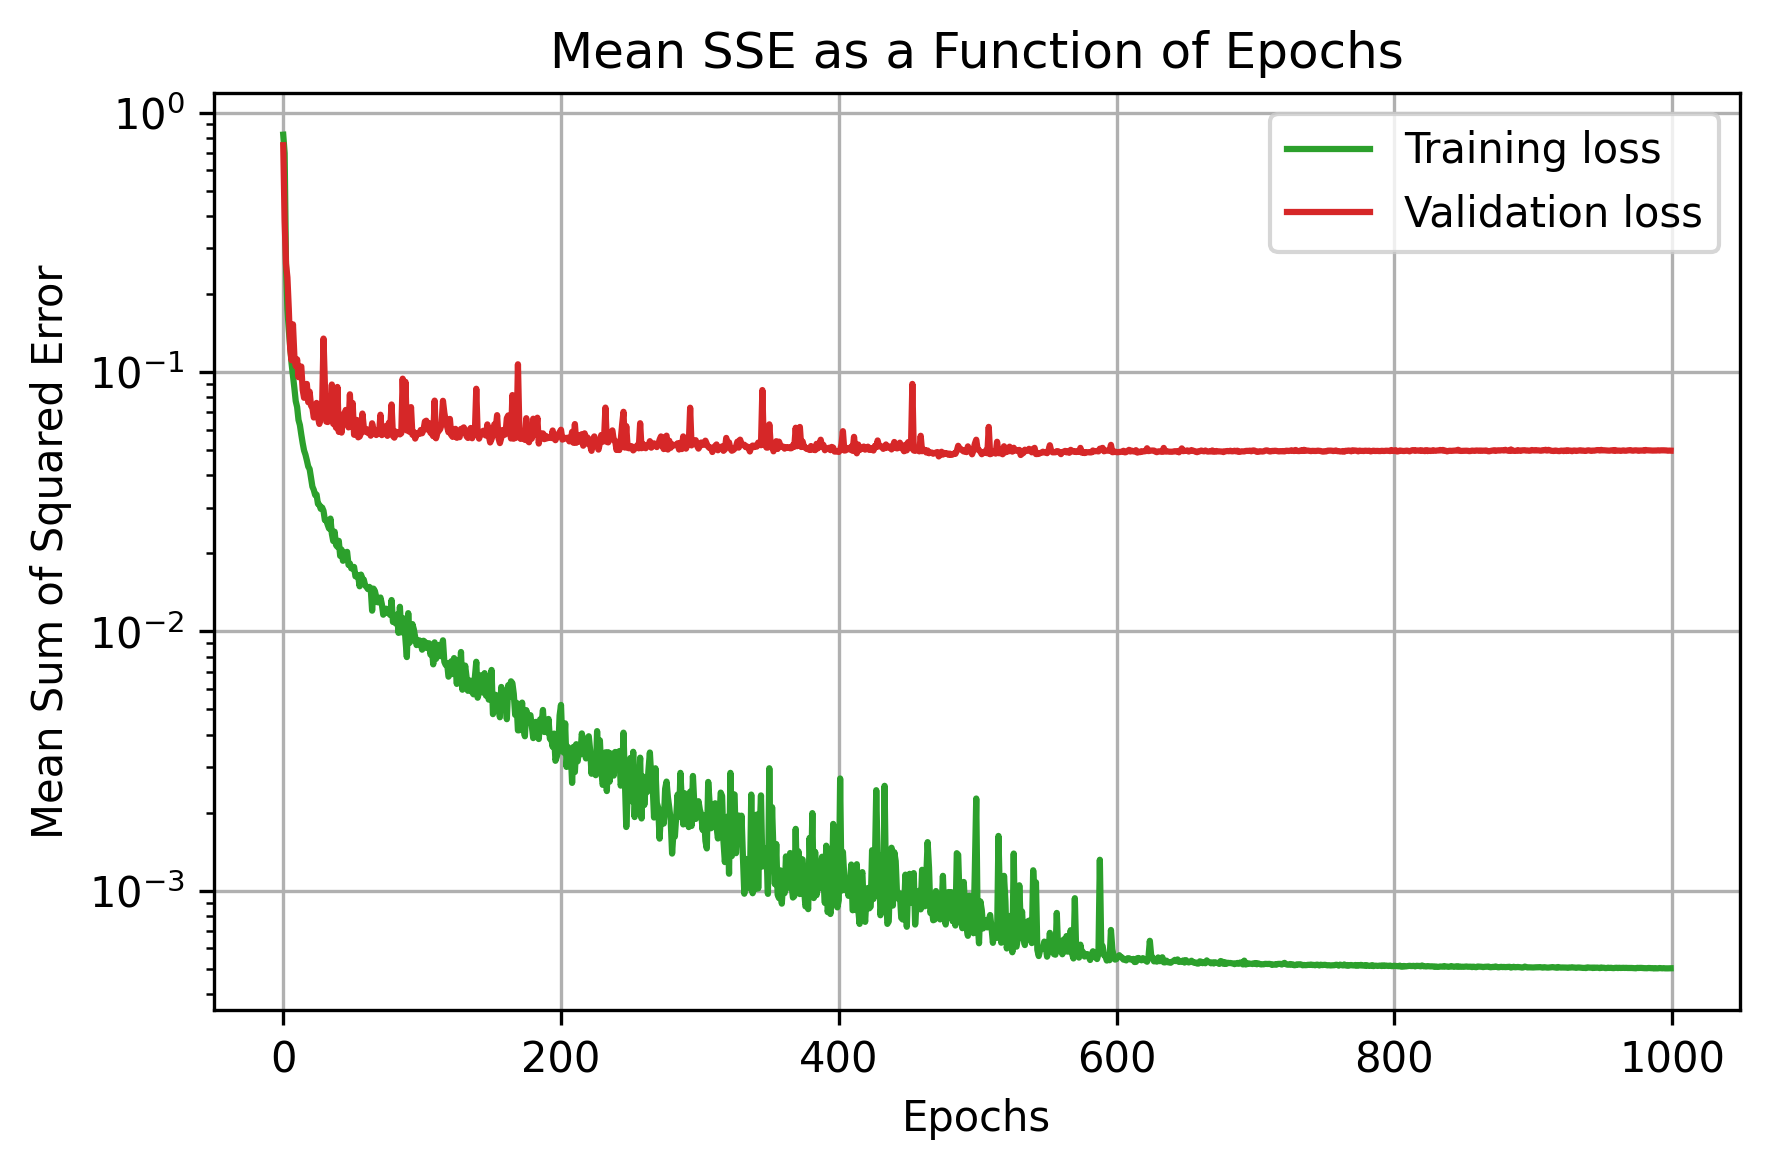

In [9]:
#idea: (store and plotting) the learning rate changes.
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
ax.semilogy(train_epochs, train_loss, color='C2', label="Training loss", marker='', linestyle='solid')
ax.semilogy(valid_epochs, valid_loss, color='C3', label="Validation loss", marker='', linestyle='solid')
ax.grid()
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Sum of Squared Error")
ax.set_title("Mean SSE as a Function of Epochs")
fig.tight_layout()